In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Leer los datos de archivo csv, typed_uanl.csv con el URL
url =  "C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 3/Practica/RentasBicicletasSEUL.csv"
df = pd.read_csv(url)

In [4]:
# Mostrar las primeras filas del DataFrame
print(df.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [6]:
# Seleccionar características y etiquetas
X = df.drop(['Rented Bike Count', 'Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
y = (df['Rented Bike Count'] > 500).astype(int)  # Etiqueta: 1 si > 500 bicicletas rentadas, 0 si no


In [9]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [10]:
# Convertir características categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

In [11]:
X.head(5)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [12]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Hacer predicciones con los datos de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.898972602739726
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       884
           1       0.90      0.90      0.90       868

    accuracy                           0.90      1752
   macro avg       0.90      0.90      0.90      1752
weighted avg       0.90      0.90      0.90      1752

[[798  86]
 [ 91 777]]


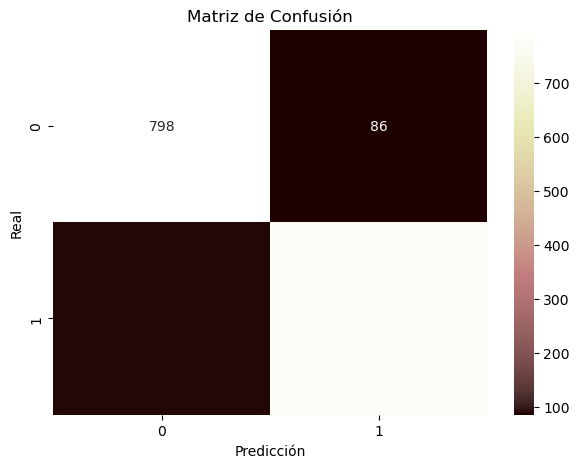

In [22]:
# Crear una matriz de confusión
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 3/Practica/GraficaMatrizConfusion.png")
plt.show()
plt.close()

In [28]:
# Definir las características y el target
features = ["Hour", "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]
X = df[features]

y = df["Rented Bike Count"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualizar la importancia de las características
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

Mean Squared Error: 179672.43378995435
R^2 Score: 0.5687650156685533


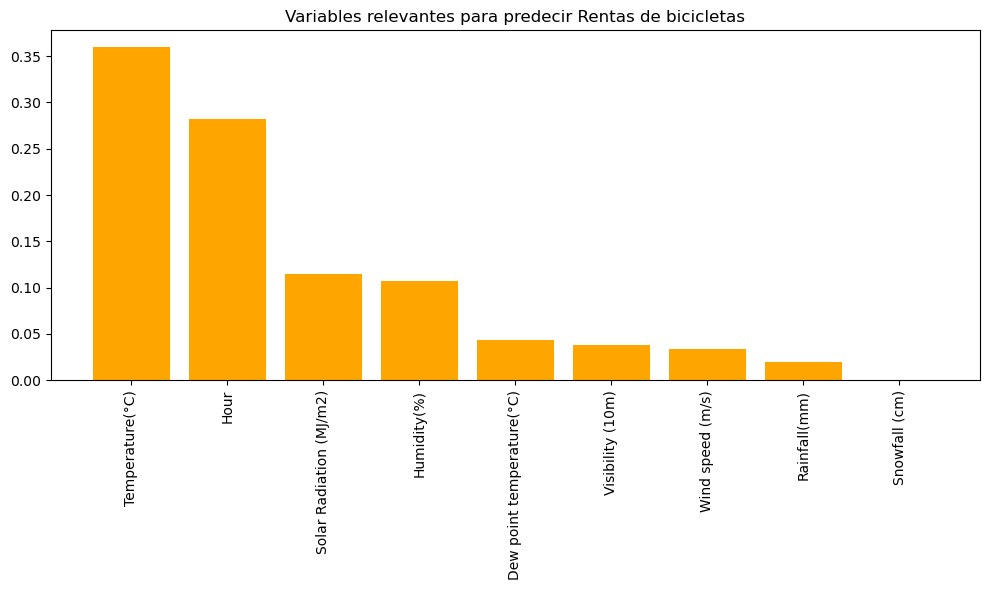

In [36]:
plt.figure(figsize=(10, 6))
plt.title("Variables relevantes para predecir Rentas de bicicletas")
plt.bar(range(X.shape[1]), importances[indices], align="center" , color="orange")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 3/Practica/GraficaArbol.png")
plt.show()
plt.close()
